In [1]:
import ctypes
import networkx
import json
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
from pylab import *


In [2]:
_evolution = ctypes.CDLL('./_evolution.so')

### Do the experiment.

In [3]:
result = _evolution.experiment_adding_two_numbers()

### Get how many generations it took.

In [4]:
_evolution.get_int.restype = ctypes.c_int
generations = _evolution.get_int(ctypes.c_int(0),ctypes.c_int(0)) - 1

print(generations)

149


In [5]:
def show_stats(t_stats,t_size,t_title,t_xlabel,t_ylabel):
    stats = np.ctypeslib.as_array( (ctypes.c_double * t_size).from_address(ctypes.addressof(t_stats.contents)))

    t = arange(0.0, t_size, 1)
    plot(t, stats)
 
    xlabel(t_xlabel)
    ylabel(t_ylabel)
    title(t_title)
    grid(True)
    show()

### Get the statistics.

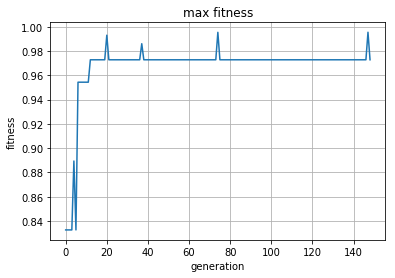

In [6]:
_evolution.get_stats.restype = ctypes.POINTER(ctypes.c_double)
stats = _evolution.get_stats(ctypes.c_int(0),ctypes.c_int(1))

show_stats(stats,generations, "max fitness", "generation", "fitness")

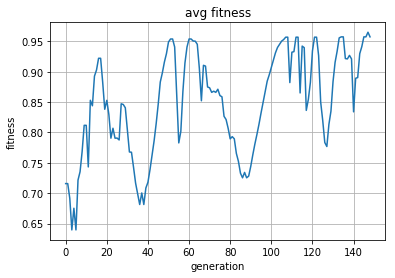

In [7]:
stats = _evolution.get_stats(ctypes.c_int(0),ctypes.c_int(0))

show_stats(stats,generations, "avg fitness", "generation", "fitness")

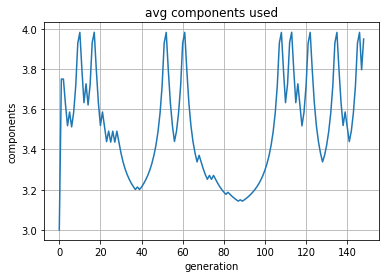

In [8]:
stats = _evolution.get_stats(ctypes.c_int(0),ctypes.c_int(2))

show_stats(stats, generations, "avg components used", "generation", "components")

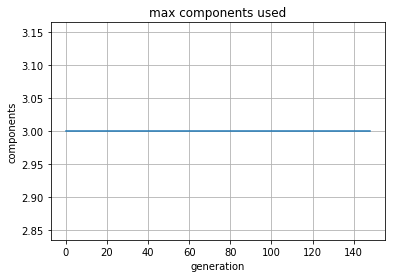

In [9]:
stats = _evolution.get_stats(ctypes.c_int(0),ctypes.c_int(3))

show_stats(stats, generations, "max components used", "generation", "components")

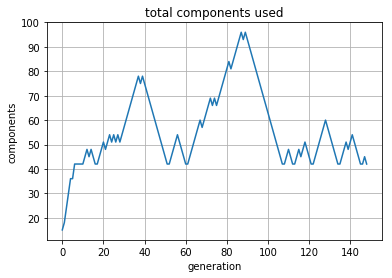

In [10]:
stats = _evolution.get_stats(ctypes.c_int(0),ctypes.c_int(4))

show_stats(stats, generations, "total components used", "generation", "components")

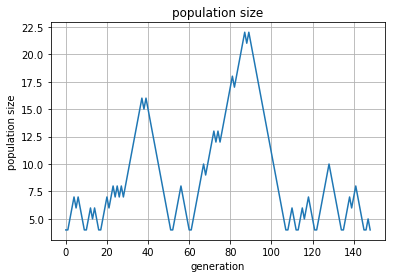

In [11]:
stats = _evolution.get_stats(ctypes.c_int(0),ctypes.c_int(5))

show_stats(stats, generations, "population size", "generation", "population size")